In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/NGAsub_MegaFlatfile_RotD50_050_R211022_public.csv'
df = pd.read_csv(file_path)

<ipython-input-3-d4117e90ff05>:2: DtypeWarning: Columns (32,34,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
#point 1 remove lack of metadata
metadatamag_rem=df[df.iloc[:,8]==-999].index
metadatahyp_rem = df[df.iloc[:, 11] == -999].index
metadatajb_rem = df[df.iloc[:, 46] == -999].index
metadatavel_rem = df[df.iloc[:, 72] == -999].index

metadat_rem = (metadatamag_rem
               .union(metadatahyp_rem)
               .union(metadatajb_rem)
               .union(metadatavel_rem))

df.drop(index=metadat_rem, inplace=True)
# df1.drop(index=metadat_rem, inplace=True)

In [ ]:
#other than forearc removed
metadata_forearc_flag = df[df.iloc[:, 61] != 2].index
# rrup less than 1000 km
metadatarup_rem = df[df.iloc[:, 47] > 1000].index
# sensor depth
metadatasend_rem = df[df.iloc[:, 70] > 2].index
# seggregate the interface and intraslab
metadata_inter = df[(df.iloc[:, 17] == 0) & (df.iloc[:, 11] > 40)].index
metadata_intra_slab = df[(df.iloc[:, 17] == 1) & (df.iloc[:, 11] > 200)].index
# T<Tlu
LUT_rem = df[df.iloc[:, 41] < 4].index
# multiple events
metadatamlte_rem = df[df.iloc[:, 19] == 1].index
# late trigger
metadatalatep_rem = df[df.iloc[:, 39] == 1].index
# Rremoving PGA>10
metadatapga_rem = df[df.iloc[:, 113] > 10].index

# removing ALL POINTS
metadat_rem1 = (metadata_forearc_flag
                .union(metadatarup_rem)
                .union(metadata_inter)
                .union(metadata_intra_slab)
                .union(LUT_rem)
                .union(metadatamlte_rem)
                .union(metadatasend_rem)
                .union(metadatalatep_rem)
                .union(metadatapga_rem))

df.drop(metadat_rem1, inplace=True)
# df1.drop(metadat_rem1, inplace=True)


In [ ]:
# source review flag
df = df[df.iloc[:, 23] != -1]
#Interface and intraslab flags (only 0 and 1)
metadata_rem_flag1=df[df.iloc[:,17]==2].index;
metadata_rem_flag2=df[df.iloc[:,17]==3].index;
metadata_rem_flag3=df[df.iloc[:,17]==4].index;
metadata_rem_flag4=df[df.iloc[:,17]==-444].index;
metadata_rem_flag5=df[df.iloc[:,17]==-666].index;
metadata_rem_flag6=df[df.iloc[:,17]==-777].index;
metadata_rem_flag7=df[df.iloc[:,17]==-888].index;
metadata_rem_flag8=df[df.iloc[:,17]==-999].index;
metadat=metadata_rem_flag1.union(metadata_rem_flag2).union(metadata_rem_flag3).union(metadata_rem_flag4).union(metadata_rem_flag5).union(metadata_rem_flag6).union(metadata_rem_flag7).union(metadata_rem_flag8);

df.drop(metadat, inplace=True)
# df1.drop(metadat, inplace=True)

PGA_rem = df[df.iloc[:,114] == -999].index
df.drop(index=PGA_rem, inplace=True)
PGA_g = df[df.iloc[:,113] == -999].index
df.drop(index=PGA_g, inplace=True)
# df1.drop(index=PGA_rem, inplace=True)

<ipython-input-6-de6c9e5cc24f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(metadat, inplace=True)
<ipython-input-6-de6c9e5cc24f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=PGA_rem, inplace=True)
<ipython-input-6-de6c9e5cc24f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=PGA_g, inplace=True)


In [ ]:
# interpolation
period = [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.12, 0.15, 0.17, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1, 2, 3, 4]
psa_sub = df.iloc[:, 116:226].astype(float)

T = df.columns[116:226].to_numpy()
for i in range(len(T)):
    T[i] = T[i].replace('S', '').replace('T', '').replace('pt', '.')

T = T.astype(np.float64)

num = psa_sub.shape[0]
psa_sub_final = np.zeros((num, len(period)), dtype = np.float64)

for i in range(num):
    psa_sub_final[i, :] = np.interp(period, T, psa_sub.iloc[i, :])

In [ ]:
print(psa_sub_final.shape)


(20125, 20)


In [ ]:
import pandas as pd

# Convert psa_sub_final array to DataFrame
interpolated_data = pd.DataFrame(psa_sub_final)

# Define the path where you want to save the Excel file
excel_file_path = "/content/drive/MyDrive/interpolated_data.xlsx"

# Save the DataFrame to an Excel file
interpolated_data.to_excel(excel_file_path, index=False)

print("Interpolated data saved to:", excel_file_path)


Interpolated data saved to: /content/drive/MyDrive/interpolated_data.xlsx


In [ ]:
# Reference the saved Excel file
excel_file_path = "/content/drive/MyDrive/interpolated_data.xlsx"

# Now you can use excel_file_path in your code, for example:
# Read the Excel file into a DataFrame
interpolated_data = pd.read_excel(excel_file_path)

# Further processing or analysis on the DataFrame...


In [ ]:
print(interpolated_data)

             0         1         2         3         4         5         6   \
0      0.002600  0.002617  0.002650  0.002714  0.003025  0.003535  0.003556   
1      0.002780  0.002862  0.003020  0.003297  0.004305  0.007679  0.012509   
2      0.000135  0.000136  0.000136  0.000136  0.000136  0.000136  0.000137   
3      0.029530  0.029604  0.029802  0.030146  0.031699  0.035459  0.046600   
4      0.000884  0.000884  0.000885  0.000887  0.000889  0.000896  0.000915   
...         ...       ...       ...       ...       ...       ...       ...   
20120  0.000185  0.000185  0.000186  0.000187  0.000188  0.000194  0.000208   
20121  0.005410  0.005419  0.005435  0.005465  0.005492  0.005644  0.006084   
20122  0.002029  0.002034  0.002046  0.002067  0.002076  0.002388  0.002959   
20123  0.001335  0.001337  0.001342  0.001352  0.001405  0.001562  0.001972   
20124  0.000656  0.000675  0.000742  0.000790  0.000964  0.001370  0.001843   

             7         8         9         10      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras

# Generate some example data
# np.random.seed(42)
M = df['Earthquake_Magnitude']
Vs30 = df['Vs30_Selected_for_Analysis_m_s']
Rup = df['ClstD_km']
fdepth=df['Hypocenter_Depth_km']
fmech=df['Fault_Type']
#log_PGA = 2 + (1.5 * M)+ (0.8 * R) + (0.3 * np.log(R)) + (0.5 * np.log(Vs30))+ np.random.normal(0, 0.1, len(M))

X = np.column_stack((M, Rup, np.log(Rup), np.log(Vs30),fdepth))
y =np.log(interpolated_data)

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
X.shape

(20125, 5)

In [ ]:
y.shape


(20125, 20)

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.3 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb

# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             learning_rate=0.1,
                             max_depth=6,
                             n_estimators=100)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predictions on the training, validation, and test sets
y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb = xgb_model.predict(X_val)
y_test_pred_xgb = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE for training, validation, and test sets
mse_train = mean_squared_error(y_train, y_train_pred_xgb)
mse_val = mean_squared_error(y_val, y_val_pred_xgb)
mse_test = mean_squared_error(y_test, y_test_pred_xgb)

# Calculate R2 score for training, validation, and test sets
r2_train = r2_score(y_train, y_train_pred_xgb)
r2_val = r2_score(y_val, y_val_pred_xgb)
r2_test = r2_score(y_test, y_test_pred_xgb)

print("Mean Squared Error (MSE):")
print(f"Training Set: {mse_train}")
print(f"Validation Set: {mse_val}")
print(f"Test Set: {mse_test}")

print("\nR-squared (R2) Score:")
print(f"Training Set: {r2_train}")
print(f"Validation Set: {r2_val}")
print(f"Test Set: {r2_test}")


Mean Squared Error (MSE):
Training Set: 0.0010700004783169507
Validation Set: 0.009528581686429036
Test Set: 0.011262647494069702

R-squared (R2) Score:
Training Set: 0.9438189451751864
Validation Set: 0.5199290518849142
Test Set: 0.400875252700176


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost regressor with regularization
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             learning_rate=0.1,
                             max_depth=6,
                             n_estimators=100,
                             reg_alpha=0.1,   # Regularization parameter
                             reg_lambda=0.1)  # Regularization parameter

# Train the XGBoost model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Predictions on the training, validation, and test sets
y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb = xgb_model.predict(X_val)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE for training, validation, and test sets
mse_train = mean_squared_error(y_train, y_train_pred_xgb)
mse_val = mean_squared_error(y_val, y_val_pred_xgb)
mse_test = mean_squared_error(y_test, y_test_pred_xgb)

# Calculate R2 score for training, validation, and test sets
r2_train = r2_score(y_train, y_train_pred_xgb)
r2_val = r2_score(y_val, y_val_pred_xgb)
r2_test = r2_score(y_test, y_test_pred_xgb)

print("Mean Squared Error (MSE):")
print(f"Training Set: {mse_train}")
print(f"Validation Set: {mse_val}")
print(f"Test Set: {mse_test}")

print("\nR-squared (R2) Score:")
print(f"Training Set: {r2_train}")
print(f"Validation Set: {r2_val}")
print(f"Test Set: {r2_test}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Squared Error (MSE):
Training Set: 0.3321045220911016
Validation Set: 0.5598603631938606
Test Set: 0.5489027807549471

R-squared (R2) Score:
Training Set: 0.9256937098214021
Validation Set: 0.8823230018467134
Test Set: 0.8778537255667574


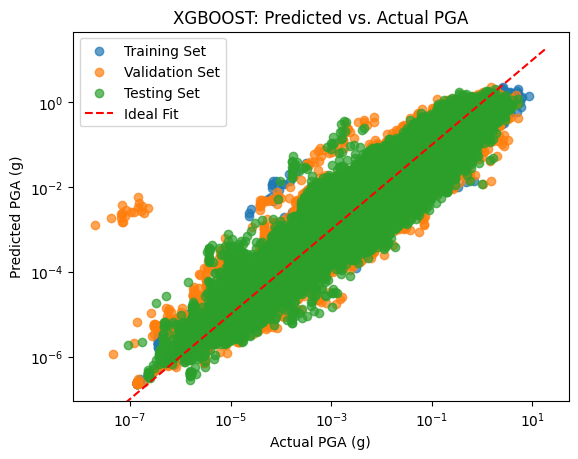

In [ ]:
plt.scatter(np.exp(y_train), np.exp(y_train_pred_xgb), label='Training Set', alpha=0.7)
plt.scatter(np.exp(y_val), np.exp(y_val_pred_xgb), label='Validation Set', alpha=0.7)
plt.scatter(np.exp(y_test), np.exp(y_test_pred_xgb), label='Testing Set', alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual PGA (g)')
plt.ylabel('Predicted PGA (g)')
plt.title('XGBOOST: Predicted vs. Actual PGA')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2_scores = []

for i in range(len(period)):
    # Make predictions for the current period
    y_train_pred_period = xgb_model.predict(X_train)[:, i]
    y_val_pred_period = xgb_model.predict(X_val)[:, i]
    y_test_pred_period = xgb_model.predict(X_test)[:, i]

    # Exponentiate the target values and predictions
    y_train_exp = (y_train.iloc[:, i])
    y_val_exp = (y_val.iloc[:, i])
    y_test_exp =(y_test.iloc[:, i])
    y_train_pred_exp = (y_train_pred_period)
    y_val_pred_exp = (y_val_pred_period)
    y_test_pred_exp =(y_test_pred_period)

    # Calculate R2 score for the current period
    r2_train_period = r2_score(y_train_exp, y_train_pred_exp)
    r2_val_period = r2_score(y_val_exp, y_val_pred_exp)
    r2_test_period = r2_score(y_test_exp, y_test_pred_exp)

    r2_scores.append((r2_train_period, r2_val_period, r2_test_period))

r2_scores = np.array(r2_scores)

print("R-squared (R2) Scores for Each Period:")
print("Period\t\tTrain Set\tValidation Set\tTest Set")
for i in range(len(period)):
    print(f"{period[i]:.2f}\t\t{r2_scores[i][0]:.4f}\t\t{r2_scores[i][1]:.4f}\t\t{r2_scores[i][2]:.4f}")


R-squared (R2) Scores for Each Period:
Period		Train Set	Validation Set	Test Set
0.01		0.9294		0.8894		0.8852
0.02		0.9303		0.8890		0.8858
0.03		0.9294		0.8894		0.8835
0.04		0.9259		0.8861		0.8804
0.05		0.9236		0.8839		0.8760
0.07		0.9197		0.8731		0.8650
0.10		0.9160		0.8671		0.8600
0.12		0.9145		0.8645		0.8591
0.15		0.9186		0.8680		0.8619
0.17		0.9176		0.8690		0.8637
0.20		0.9222		0.8731		0.8693
0.25		0.9248		0.8787		0.8731
0.30		0.9282		0.8822		0.8791
0.40		0.9326		0.8896		0.8850
0.50		0.9345		0.8939		0.8881
0.75		0.9313		0.8916		0.8852
1.00		0.9278		0.8879		0.8830
2.00		0.9226		0.8807		0.8810
3.00		0.9276		0.8906		0.8921
4.00		0.9374		0.8987		0.9008


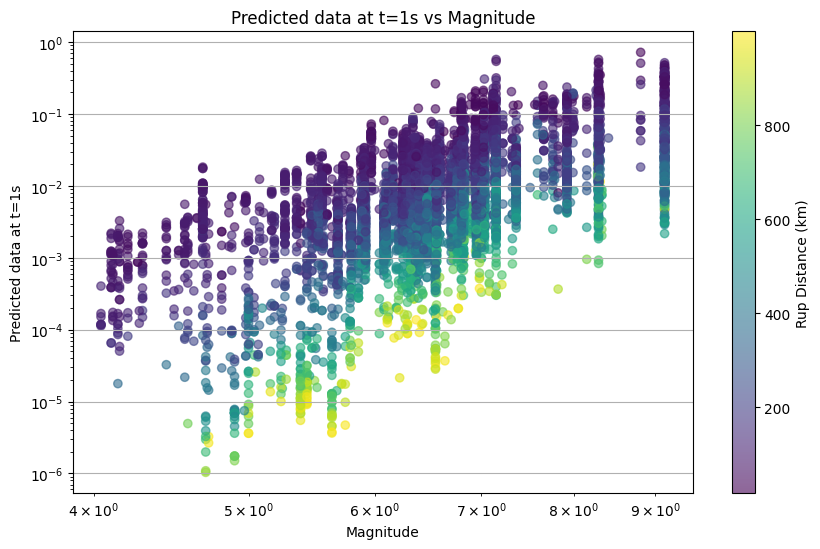

In [ ]:
# Extract predictions at t=1s from the model
y_pred_t1 = xgb_model.predict(X_test)[:, 16]  # Assuming the index corresponding to t=1s is 16

# Extract magnitude and Rup distance for labeling
magnitude = df.reset_index()['Earthquake_Magnitude'][y_test.index]
Rup_distance =df.reset_index()['ClstD_km'][y_test.index]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(magnitude, np.exp(y_pred_t1), c=Rup_distance, cmap='viridis', alpha=0.6)

# Add labels and title
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Magnitude')
plt.ylabel('Predicted data at t=1s')
plt.title('Predicted data at t=1s vs Magnitude')
plt.colorbar(label='Rup Distance (km)')  # Add color bar for Rup distances
plt.grid(True)
plt.show()


<ipython-input-20-c2c1647f9d42>:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(y_test.values) - np.log(xgb_model.predict(X_test))


ValueError: x and y must be the same size

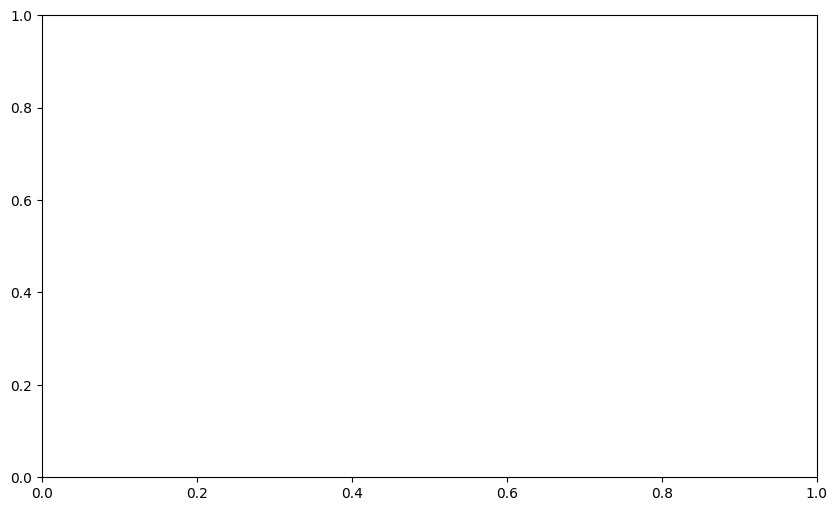

In [ ]:
# Calculate residuals
residuals = np.log(y_test.values) - np.log(xgb_model.predict(X_test))

df_reset_index = df.reset_index()

# Extract magnitudes for x-axis
magnitude = df_reset_index['Earthquake_Magnitude'][y_test.index]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(magnitude, residuals, alpha=0.6)

# Add labels and title
plt.xlabel('Magnitude')
plt.ylabel('Residuals (log scale)')
plt.title('Residuals vs Magnitude')
plt.grid(True)
plt.show()


<ipython-input-34-dab5b2f444f7>:10: RuntimeWarning: invalid value encountered in log
  residuals = np.log(y_test.values.flatten()) - np.log(y_pred.flatten())


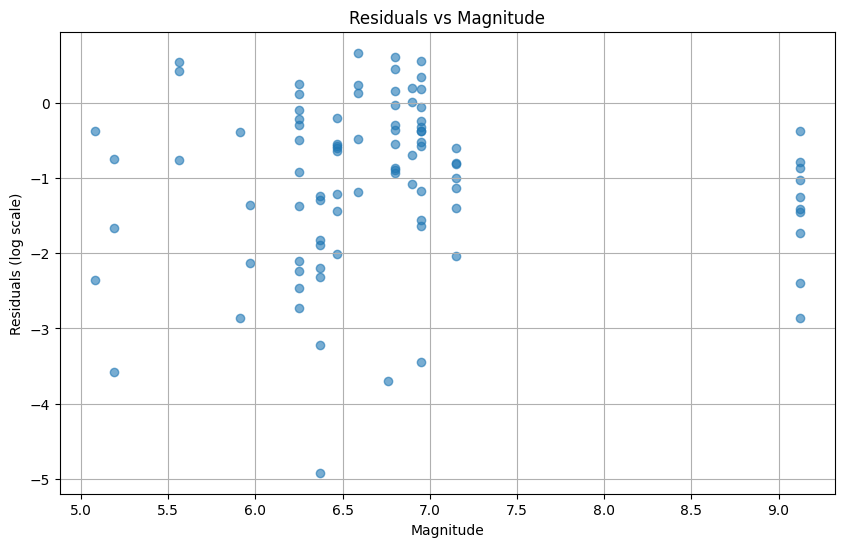

In [ ]:
import pandas as pd
# Reset the index of the DataFrame and align it with y_test
df_reset_index = df.reset_index(drop=True)

# Extract magnitudes for x-axis
magnitude = df_reset_index['Earthquake_Magnitude']

# Calculate residuals
y_pred = np.exp(xgb_model.predict(X_test))
residuals = np.log(y_test.values.flatten()) - np.log(y_pred.flatten())

# Convert magnitude and residuals to Pandas Series for alignment
magnitude_series = pd.Series(magnitude)
residuals_series = pd.Series(residuals)

# Align magnitude and residuals based on the index
magnitude_aligned, residuals_aligned = magnitude_series.align(residuals_series)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(magnitude_aligned, residuals_aligned, alpha=0.6)

# Add labels and title
plt.xlabel('Magnitude')
plt.ylabel('Residuals (log scale)')
plt.title('Residuals vs Magnitude')
plt.grid(True)
plt.show()


<ipython-input-31-dfeccae881a0>:3: RuntimeWarning: invalid value encountered in log
  residuals_all = np.log(y.values.flatten()) - np.log(y_pred_all.flatten())


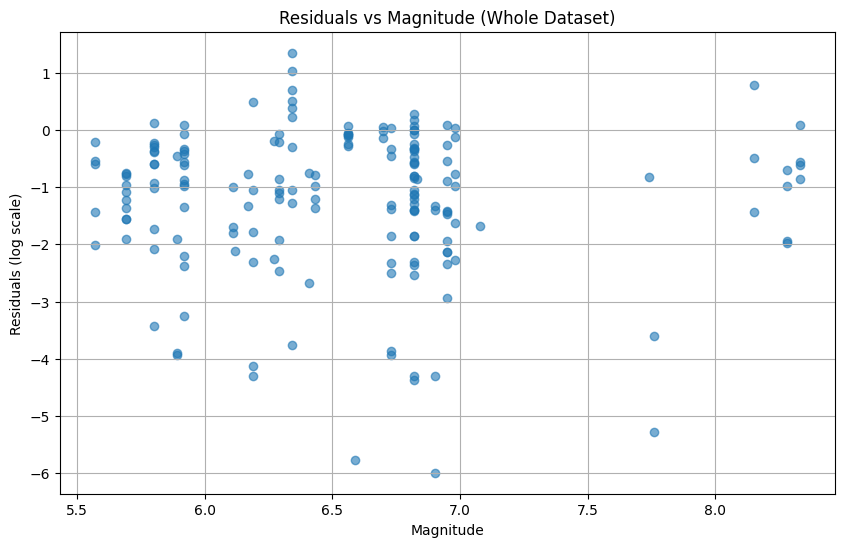

In [ ]:
# Calculate residuals for the entire dataset
y_pred_all = np.exp(xgb_model.predict(X))
residuals_all = np.log(y.values.flatten()) - np.log(y_pred_all.flatten())

# Extract magnitudes for x-axis
magnitude_all = df['Earthquake_Magnitude']

magnitude_series = pd.Series(magnitude_all)
residuals_series = pd.Series(residuals_all)

# Align magnitude and residuals based on the index
magnitude_aligned, residuals_aligned = magnitude_series.align(residuals_series)
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(magnitude_aligned, residuals_aligned, alpha=0.6)

# Add labels and title
plt.xlabel('Magnitude')
plt.ylabel('Residuals (log scale)')
plt.title('Residuals vs Magnitude (Whole Dataset)')
plt.grid(True)
plt.show()